In [ ]:
import pandas as pd
import math
df = pd.read_excel('CNH_Macroeconomic_Data.xlsx', sheet_name ='Sheet2', skiprows=3)
df= df.rename({'Unnamed: 0': 'Date'}, axis = 1)
df = df.iloc[2:]
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

df = df[['CPMINDX Index', 'HSI Index', 'SPX Index', 'H1DBTO Index',
       'CNTBI2 Index', 'CNTSTCN Index',  'CHBGRMBI Index',
       'CNUERATE Index', 'GCNY2YR Index', 'GCNY10YR Index', 'CNGDPYOY Index',
       'EHCACN Index', 'USGG10YR Index', 'USGG2YR Index']]


df['2YIR'] = df['GCNY2YR Index'] - df['USGG2YR Index']
df['10YIR']=df['GCNY10YR Index'] - df['USGG10YR Index']
df=df.astype(float)

df['EQ Spread'] = np.log(df['HSI Index']) - np.log(df['SPX Index'])
df


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,CPMINDX Index,HSI Index,SPX Index,H1DBTO Index,CNTBI2 Index,CNTSTCN Index,CHBGRMBI Index,CNUERATE Index,GCNY2YR Index,GCNY10YR Index,CNGDPYOY Index,EHCACN Index,USGG10YR Index,USGG2YR Index,2YIR,10YIR,EQ Spread
Date,,,,,,,,,,,,,,,,,
2015-01-01,50.1,23605.04,2058.90,368480.0,3.3082,306.40,100.0000,4.09,3.420,3.650,7.3,2.21,2.1712,0.6645,2.7555,1.4788,2.439288
2015-01-02,50.1,23857.82,2058.20,368480.0,3.3082,306.40,100.0000,4.09,3.420,3.650,7.3,2.21,2.1105,0.6647,2.7553,1.5395,2.450280
2015-01-05,50.1,23721.32,2020.58,2596900.0,3.3071,306.40,100.8348,4.09,3.340,3.650,7.3,2.21,2.0320,0.6568,2.6832,1.6180,2.462990
2015-01-06,50.1,23485.41,2002.61,1411140.0,3.2901,306.40,100.9250,4.09,3.330,3.640,7.3,2.21,1.9402,0.6250,2.7050,1.6998,2.461928
2015-01-07,50.1,23681.26,2025.90,1300960.0,3.2522,306.40,101.2659,4.09,3.300,3.650,7.3,2.21,1.9677,0.6091,2.6909,1.6823,2.458670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-06,50.2,24369.71,5738.52,50914025.0,1.4470,752.91,99.2215,3.96,1.449,1.787,5.4,2.25,4.2784,3.9590,-2.5100,-2.4914,1.446140
2025-03-07,50.2,24231.30,5770.20,49444429.0,1.5070,752.91,99.0489,3.96,1.524,1.845,5.4,2.25,4.3011,3.9997,-2.4757,-2.4561,1.434938
2025-03-10,50.2,23783.49,5614.56,46227845.0,1.5355,752.91,98.9487,3.96,1.527,1.872,5.4,2.25,4.2131,3.8833,-2.3563,-2.3411,1.443628


In [ ]:

import pandas as pd
price = pd.read_excel('CNH_Macroeconomic_Data.xlsx', sheet_name ='Sheet1', skiprows=3)
price= price.rename({'Unnamed: 0': 'Date'}, axis = 1)
price = price.iloc[2:]
price = price.set_index('Date')
price.index = pd.to_datetime(df.index)


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # X = macroeconomic indicators


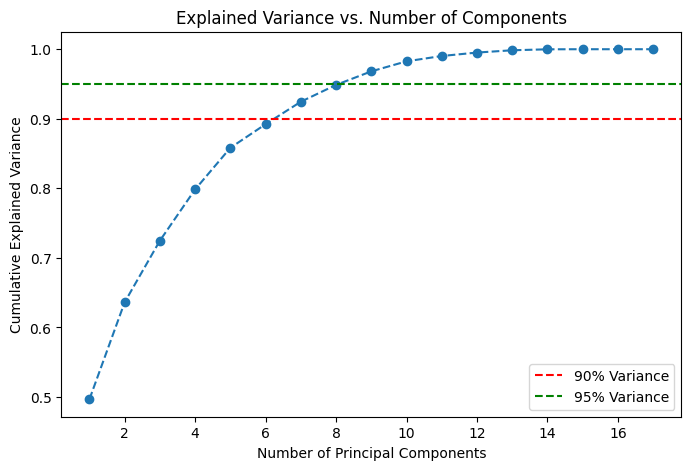

Optimal number of PCA components: 9


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

# Find the optimal number of components
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of PCA components: {optimal_components}")

In [ ]:

# Apply PCA
pca = PCA(n_components=8)  # Keep 9 principal components
X_pca = pca.fit_transform(X_scaled)

# Convert back to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(8)])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by each component: {explained_variance}")
print(f"Total variance explained by 9 components: {sum(explained_variance):.2f}")


Variance explained by each component: [0.49677524 0.13946714 0.08855037 0.07367575 0.05978175 0.0339729
 0.0322648  0.02420946]
Total variance explained by 9 components: 0.95



Explained Variance by Components: [0.49677524 0.13946714 0.08855037 0.07367575 0.05978175 0.0339729
 0.0322648  0.02420946]

PCA Feature Loadings (Top Contributing Features for Each PC):
                     PC1       PC2       PC3       PC4       PC5       PC6  \
CPMINDX Index   0.083988  0.066742  0.147352  0.663751 -0.496558 -0.080907   
HSI Index       0.265582 -0.170304  0.074141  0.320129  0.225481  0.030271   
SPX Index      -0.285874 -0.065148 -0.086818  0.285621  0.244493  0.372597   
H1DBTO Index   -0.204757 -0.044732 -0.165105  0.412095  0.372079 -0.278662   
CNTBI2 Index    0.279284  0.160626  0.152084 -0.040440  0.041469  0.471610   
CNTSTCN Index  -0.246107  0.104696 -0.137628  0.269564 -0.237296  0.383529   
CHBGRMBI Index -0.147439  0.451774 -0.074408 -0.121199  0.031149  0.297867   
CNUERATE Index -0.033429  0.543036 -0.017603  0.179633 -0.145259 -0.284473   
GCNY2YR Index   0.288179  0.080051  0.335841  0.023678  0.007050  0.258652   
GCNY10YR Index  0.293851  0.0304

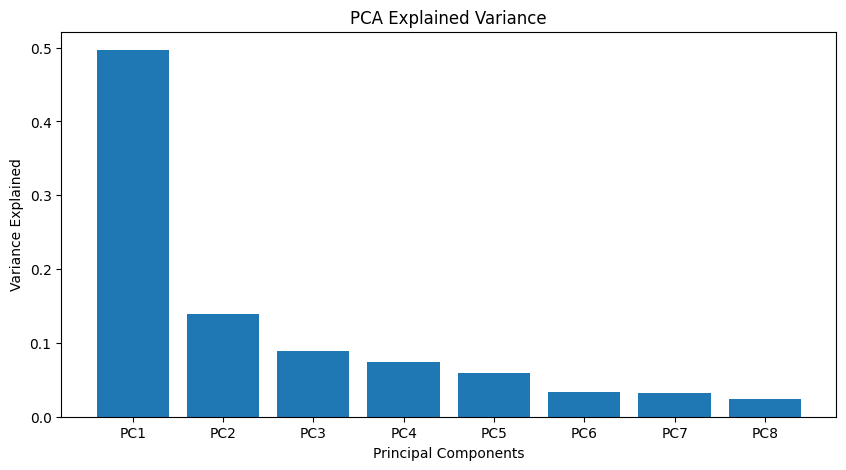

In [ ]:
features = df.columns
explained_variance = pca.explained_variance_ratio_
print(f"\nExplained Variance by Components: {explained_variance}")

# Show PCA Loadings (Feature Contribution)
pca_loadings = pd.DataFrame(pca.components_.T, index=features, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print("\nPCA Feature Loadings (Top Contributing Features for Each PC):")
print(pca_loadings)

# Plot Loadings
plt.figure(figsize=(10,5))
plt.bar(range(len(explained_variance)), explained_variance, tick_label=[f'PC{i+1}' for i in range(len(explained_variance))])
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("PCA Explained Variance")
plt.show()

In [ ]:
exog = X_pca_df.columns

In [ ]:
X_pca_df['Exchange Rate'] = price['CNH Curncy'].values

In [ ]:
df = X_pca_df
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Exchange Rate
0,3.345511,2.405776,0.766119,-0.603516,-0.354220,0.946142,0.368698,0.928902,6.219
1,3.399791,2.394234,0.733530,-0.582392,-0.340881,0.950358,0.387216,0.915430,6.2285
2,3.290535,2.472597,0.568567,-0.509033,-0.239977,0.877459,0.597104,0.876255,6.2279
3,3.335438,2.493746,0.500770,-0.593829,-0.311232,0.911317,0.497630,0.809642,6.2122
4,3.278584,2.507307,0.480994,-0.586791,-0.304507,0.887909,0.554021,0.700633,6.2158
...,...,...,...,...,...,...,...,...,...
2655,-6.947251,-0.327552,-1.267444,3.192479,2.149269,-1.929281,1.884921,0.413063,7.2441
2656,-6.796975,-0.294805,-1.112375,3.119723,2.069014,-1.744603,1.813261,0.481814,7.2452
2657,-6.557110,-0.233186,-1.112993,2.882655,1.854171,-1.634942,1.565563,0.406232,7.2634
2658,-6.142476,-0.141884,-0.710798,2.310740,1.320273,-1.160751,1.006185,0.089746,7.2268


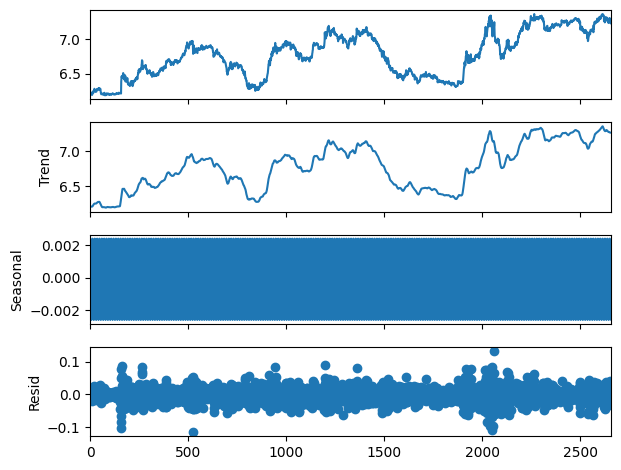

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series (Assuming monthly data)
decomposition = seasonal_decompose(df[["Exchange Rate"]], model='additive', period=12)

# Plot decomposed components
decomposition.plot()
plt.show()


<ipython-input-142-de6d07e1a315>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(method='bfill')
<ipython-input-142-de6d07e1a315>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(method='bfill')
<ipython-input-142-de6d07e1a315>:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_train = pd.to_numeric(y_train, errors='coerce').fillna(method='bfill')
<ipython-input-142-de6d07e1a315>:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_test = pd.to_numeric(y_test, errors='coerce').fillna(method='bfill')



### ADF Test for Original Data ###
ADF Statistic: -2.1571101187719557
p-value: 0.2221784405856026
🚨 Data is non-stationary (Differencing required).

### ADF Test After First Differencing ###
ADF Statistic: -11.515464432472353
p-value: 4.1606021524630974e-21
✅ Data is stationary (No differencing needed).

🔍 Checking for Seasonality using ACF...


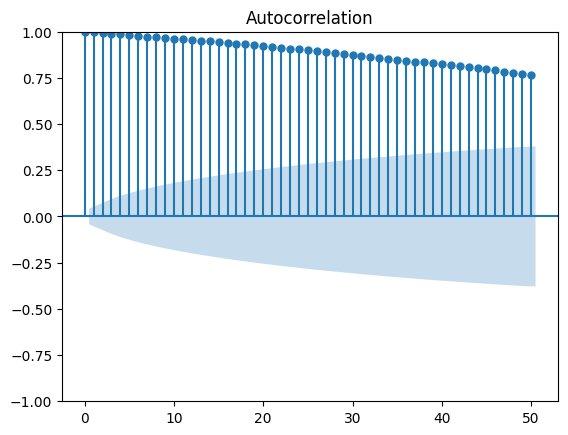

ADF Statistic: -6.275121485165587
p-value: 3.917646375971403e-08
✅ Data is stationary (No differencing needed).

✅ Final Differencing Parameters: d=0, D=0, s=12

🔍 Running Auto-SARIMA for Best (p, d, q, P, D, Q)...
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-10402.547, Time=8.53 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-10402.822, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-10408.088, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-10407.494, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-10404.233, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-10401.291, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-10408.438, Time=1.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-10406.670, Time=1.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-10406.309, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-10409.678, Time=1.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-10409.470, Time=1.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-10407.905, Time=2.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-10407.684, Time=0.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-10408.535, Time=2.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-10406.507, Time=6.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,0)[12]             : AIC=-10411.168, Time=0.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[12]             : AIC=-10410.936, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,1)[12]             : AIC=-10409.405, Time=0.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-10409.969, Time=1.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12]             : AIC=-10409.908, Time=0.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12]             : AIC=-10410.004, Time=0.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[12]             : AIC=-10407.980, Time=1.49 sec

Best model:  ARIMA(0,1,0)(2,0,0)[12]          
Total fit time: 35.493 seconds

✅ Best SARIMAX Order: (0, 1, 0)
✅ Best Seasonal Order: (2, 0, 0, 12)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Optimized SARIMAX RMSE: 0.1735
✅ Optimized SARIMAX R² Score: -1.0330


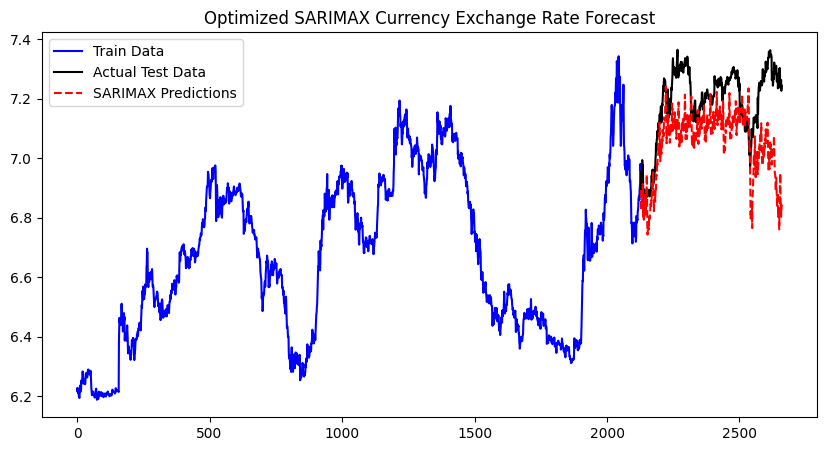

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score

# Target variable and exogenous features
exog_vars = exog # Exogenous variables
target_var = 'Exchange Rate'

# Train-Test Split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define exogenous variables
X_train, X_test = train[exog_vars], test[exog_vars]
y_train, y_test = train[target_var], test[target_var]

# Convert to numeric (fixes dtype issues)
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(method='bfill')
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(method='bfill')
y_train = pd.to_numeric(y_train, errors='coerce').fillna(method='bfill')
y_test = pd.to_numeric(y_test, errors='coerce').fillna(method='bfill')

# Function to check stationarity (ADF Test)
def adf_test(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")

    if result[1] < 0.05:
        print("✅ Data is stationary (No differencing needed).")
        return 0  # d=0
    else:
        print("🚨 Data is non-stationary (Differencing required).")
        return 1  # d=1

# Step 1: Check stationarity of original data
print("\n### ADF Test for Original Data ###")
d = adf_test(y_train)

# Step 2: Apply differencing if needed
if d == 1:
    y_train_diff = y_train.diff().dropna()
    print("\n### ADF Test After First Differencing ###")
    d = adf_test(y_train_diff)
else:
    y_train_diff = y_train  # No differencing needed

# Step 3: Find best seasonal period using ACF
print("\n🔍 Checking for Seasonality using ACF...")
plot_acf(y_train.dropna(), lags=50)
plt.show()

# Select seasonal period (s) manually based on first ACF peak (default to 12 if unsure)
s = 12  # Common for monthly data

# Step 4: Apply seasonal differencing if needed
D = 1  # Default to 1
if adf_test(y_train.diff(periods=s).dropna()) == 0:
    D = 0  # No seasonal differencing needed

print(f"\n✅ Final Differencing Parameters: d={d}, D={D}, s={s}")

# Step 5: Optimize SARIMAX Hyperparameters Using Auto-SARIMA
print("\n🔍 Running Auto-SARIMA for Best (p, d, q, P, D, Q)...")
auto_sarima_model = auto_arima(
    y_train, exogenous=X_train, seasonal=True, m=s, stepwise=True, trace=True
)

# Extract best parameters
best_p, best_d, best_q = auto_sarima_model.order
best_P, best_D, best_Q, best_s = auto_sarima_model.seasonal_order

print(f"\n✅ Best SARIMAX Order: ({best_p}, {best_d}, {best_q})")
print(f"✅ Best Seasonal Order: ({best_P}, {best_D}, {best_Q}, {best_s})")

# Step 6: Fit SARIMAX Model with Optimized Parameters
sarimax_model = SARIMAX(
    y_train, exog=X_train,
    order=(best_p, d, best_q),
    seasonal_order=(best_P, D, best_Q, best_s)
)
sarimax_fit = sarimax_model.fit()

# Step 7: Forecast on Test Data
y_pred = sarimax_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)

# Step 8: Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n✅ Optimized SARIMAX RMSE: {rmse:.4f}")
print(f"✅ Optimized SARIMAX R² Score: {r2:.4f}")

# Step 9: Plot Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_train, label="Train Data", color="blue")
plt.plot(y_test, label="Actual Test Data", color="black")
plt.plot(y_pred, label="SARIMAX Predictions", linestyle='dashed', color='red')
plt.title("Optimized SARIMAX Currency Exchange Rate Forecast")
plt.legend()
plt.show()


In [ ]:
# Extract SARIMAX Coefficients & P-values
sarimax_coefficients = sarimax_fit.params[:-1]  # Exclude 'sigma2' residual variance
sarimax_pvalues = sarimax_fit.pvalues[:-1]

# Convert to DataFrame
sarimax_importance = pd.DataFrame({
    'SARIMAX Coefficients': sarimax_coefficients,
    'SARIMAX p-values': sarimax_pvalues
})
print("\nSARIMAX Feature Importance (PCA Components):")
print(sarimax_importance)



SARIMAX Feature Importance (PCA Components):
          SARIMAX Coefficients  SARIMAX p-values
PC1                  -0.059698      8.055785e-47
PC2                  -0.072301      7.227634e-64
PC3                   0.067957      2.050215e-61
PC4                  -0.030512      4.292794e-29
PC5                  -0.047327      3.220456e-74
PC6                  -0.072763      4.900095e-86
PC7                  -0.104835     2.732899e-237
PC8                   0.089643     1.635684e-152
ar.S.L12              0.018124      2.831903e-03
ar.S.L24              0.981731      0.000000e+00


In [ ]:
sarimax_importance['SARIMAX Coefficients']

,SARIMAX Coefficients
PC1,-0.059698
PC2,-0.072301
PC3,0.067957
PC4,-0.030512
PC5,-0.047327
PC6,-0.072763
PC7,-0.104835
PC8,0.089643
ar.S.L12,0.018124
ar.S.L24,0.981731


In [ ]:
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
CPMINDX Index,0.083988,0.066742,0.147352,0.663751,-0.496558,-0.080907,-0.145278,-0.309853
HSI Index,0.265582,-0.170304,0.074141,0.320129,0.225481,0.030271,0.339098,-0.226522
SPX Index,-0.285874,-0.065148,-0.086818,0.285621,0.244493,0.372597,-0.015338,-0.003743
H1DBTO Index,-0.204757,-0.044732,-0.165105,0.412095,0.372079,-0.278662,0.450637,0.313176
CNTBI2 Index,0.279284,0.160626,0.152084,-0.040440,0.041469,0.471610,-0.039984,0.359388
CNTSTCN Index,-0.246107,0.104696,-0.137628,0.269564,-0.237296,0.383529,-0.140515,0.067886
CHBGRMBI Index,-0.147439,0.451774,-0.074408,-0.121199,0.031149,0.297867,0.502828,-0.439892
CNUERATE Index,-0.033429,0.543036,-0.017603,0.179633,-0.145259,-0.284473,0.001210,0.516402
GCNY2YR Index,0.288179,0.080051,0.335841,0.023678,0.007050,0.258652,0.165484,0.244414
GCNY10YR Index,0.293851,0.030477,0.313915,0.059927,-0.095202,0.054829,0.275632,0.018010


In [ ]:
# Get PCA Loadings (How Original Features Contribute to Each PCA Component)
pca_loadings = pd.DataFrame(pca.components_.T, index=features, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Compute Original Feature Importance by Multiplying PCA Loadings with SARIMAX Coefficients
original_feature_importance = pca_loadings @ sarimax_importance['SARIMAX Coefficients'][:-2]

# Convert to DataFrame
original_feature_importance = pd.DataFrame(original_feature_importance, columns=['Original Feature Importance'])
print("\nReconstructed Original Feature Importance:")
print(original_feature_importance.sort_values(by='Original Feature Importance', ascending=False))



Reconstructed Original Feature Importance:
                Original Feature Importance
USGG2YR Index                      0.055349
USGG10YR Index                     0.043107
CNUERATE Index                     0.029795
CNGDPYOY Index                     0.000497
CPMINDX Index                     -0.003237
CNTSTCN Index                     -0.006315
EQ Spread                         -0.008125
GCNY2YR Index                     -0.015483
CNTBI2 Index                      -0.016587
H1DBTO Index                      -0.024838
GCNY10YR Index                    -0.027007
SPX Index                         -0.030248
10YIR                             -0.043829
EHCACN Index                      -0.044321
2YIR                              -0.051378
HSI Index                         -0.077000
CHBGRMBI Index                    -0.140515


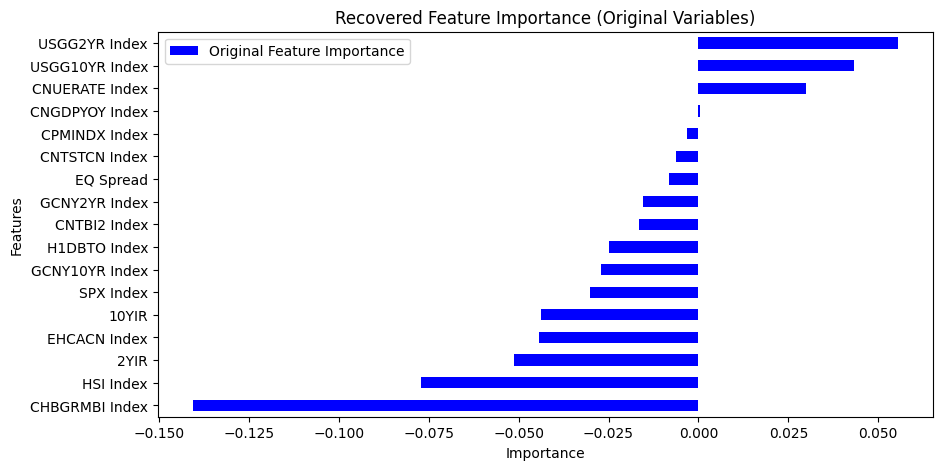

In [ ]:
import matplotlib.pyplot as plt

# Plot Feature Importance
original_feature_importance.sort_values(by='Original Feature Importance', ascending=True).plot(kind='barh', figsize=(10,5), color='blue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Recovered Feature Importance (Original Variables)")
plt.show()


                                SARIMAX Results                                 
Dep. Variable:            Exchange Rate   No. Observations:                 2128
Model:             SARIMAX(2, 0, 0, 12)   Log Likelihood                3184.307
Date:                  Thu, 13 Mar 2025   AIC                          -6346.615
Time:                          12:32:44   BIC                          -6284.322
Sample:                               0   HQIC                         -6323.814
                                 - 2128                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.0958      0.003    -33.835      0.000      -0.101      -0.090
PC2           -0.0993      0.003    -34.851      0.000      -0.105      -0.094
PC3            0.0428      0.002    

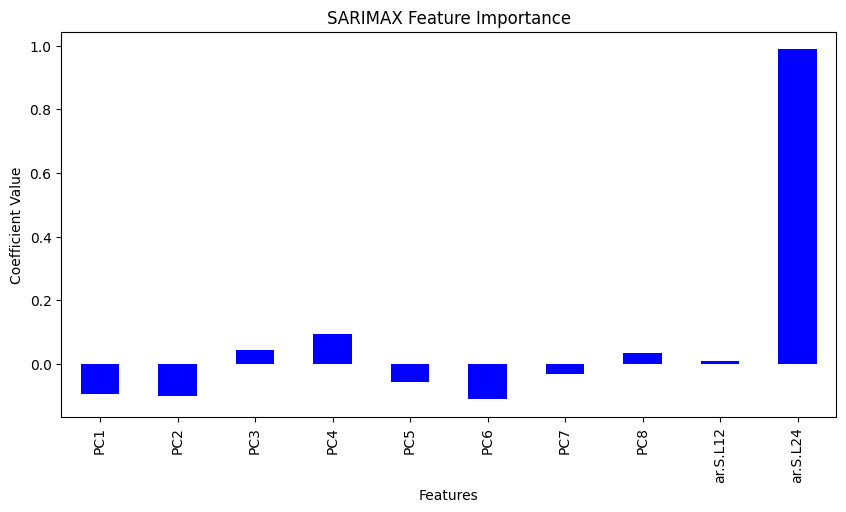

In [ ]:

# Show Coefficients & P-values
sarimax_summary = sarimax_fit.summary()
print(sarimax_summary)

# Extract feature importance
sarimax_pvalues = sarimax_fit.pvalues
sarimax_coefficients = sarimax_fit.params

print("\nSignificant Features in SARIMAX (p-values < 0.05):")
print(sarimax_pvalues[sarimax_pvalues < 0.05])

# Plot SARIMAX Feature Importance
plt.figure(figsize=(10,5))
sarimax_coefficients.drop(['sigma2']).plot(kind='bar', color='blue')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("SARIMAX Feature Importance")
plt.show()


Feature Importance Comparison (PCA vs SARIMAX):
                PCA Importance  SARIMAX Coefficient  SARIMAX p-value
ar.S.L24                   NaN             0.988952     0.000000e+00
PC4                        NaN             0.095422    1.613678e-279
PC3                        NaN             0.042773     1.278461e-85
PC8                        NaN             0.035388     3.887693e-66
ar.S.L12                   NaN             0.010970     1.390380e-05
PC7                        NaN            -0.032830     9.016158e-52
PC5                        NaN            -0.055220    3.936589e-182
PC1                        NaN            -0.095789    5.942484e-251
PC2                        NaN            -0.099312    4.093380e-266
PC6                        NaN            -0.110648     0.000000e+00
CHBGRMBI Index        1.617845                  NaN              NaN
CNGDPYOY Index        2.448658                  NaN              NaN
CNTBI2 Index          1.508497                  NaN   

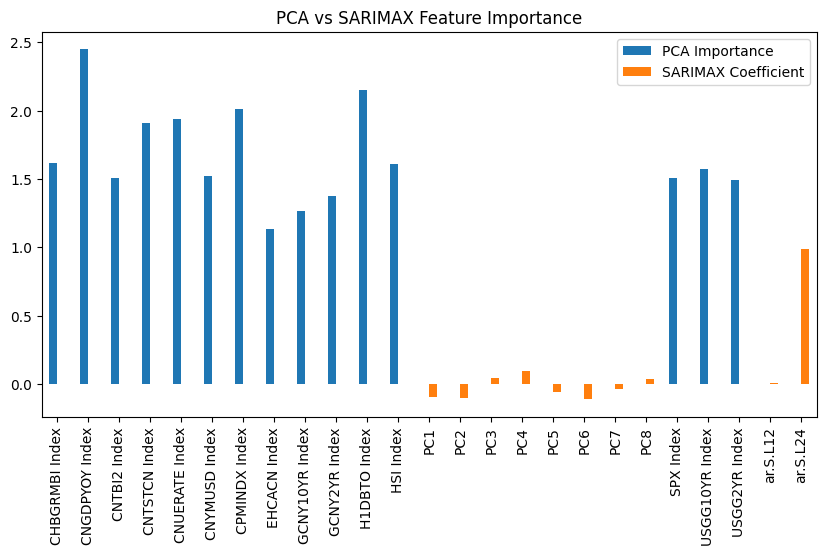

In [ ]:
# Combine PCA Loadings & SARIMAX Importance
comparison_df = pd.DataFrame({
    'PCA Importance': np.abs(pca_loadings).sum(axis=1),
    'SARIMAX Coefficient': sarimax_coefficients[:-1],  # Exclude residual sigma2
    'SARIMAX p-value': sarimax_pvalues[:-1]
})

# Show comparison
print("\nFeature Importance Comparison (PCA vs SARIMAX):")
print(comparison_df.sort_values(by='SARIMAX Coefficient', ascending=False))

# Plot PCA vs SARIMAX
comparison_df[['PCA Importance', 'SARIMAX Coefficient']].plot(kind='bar', figsize=(10,5))
plt.title("PCA vs SARIMAX Feature Importance")
plt.show()



Significant Features in SARIMAX (p-values < 0.05):
PC1         5.942484e-251
PC2         4.093380e-266
PC3          1.278461e-85
PC4         1.613678e-279
PC5         3.936589e-182
PC6          0.000000e+00
PC7          9.016158e-52
PC8          3.887693e-66
ar.S.L12     1.390380e-05
ar.S.L24     0.000000e+00
sigma2      3.064177e-242
dtype: float64


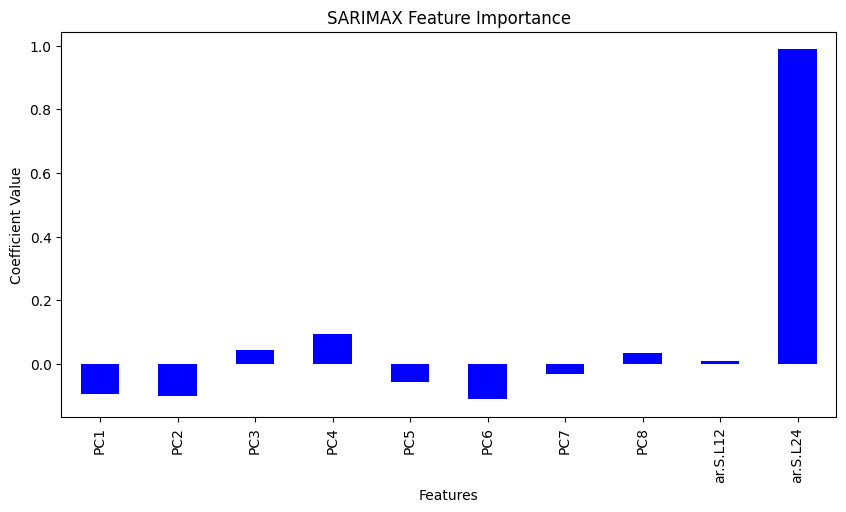

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Extract feature importance
sarimax_pvalues = sarimax_fit.pvalues
sarimax_coefficients = sarimax_fit.params

print("\nSignificant Features in SARIMAX (p-values < 0.05):")
print(sarimax_pvalues[sarimax_pvalues < 0.05])

# Plot SARIMAX Feature Importance
plt.figure(figsize=(10,5))
sarimax_coefficients.drop(['sigma2']).plot(kind='bar', color='blue')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("SARIMAX Feature Importance")
plt.show()


In [ ]:
df.columns

Index(['CPMINDX Index', 'HSI Index', 'SPX Index', 'H1DBTO Index',
       'CNTBI2 Index', 'CNTSTCN Index', 'CNYMUSD Index', 'CHBGRMBI Index',
       'CNUERATE Index', 'GCNY2YR Index', 'GCNY10YR Index', 'CNGDPYOY Index',
       'EHCACN Index', 'USGG10YR Index', 'USGG2YR Index'],
      dtype='object')

In [ ]:
df['2Y interest differential'] = df['GCNY2YR Index'] - df['USGG2YR Index']
df['10Y interest differential'] = df['GCNY10YR Index'] - df['USGG10YR Index']

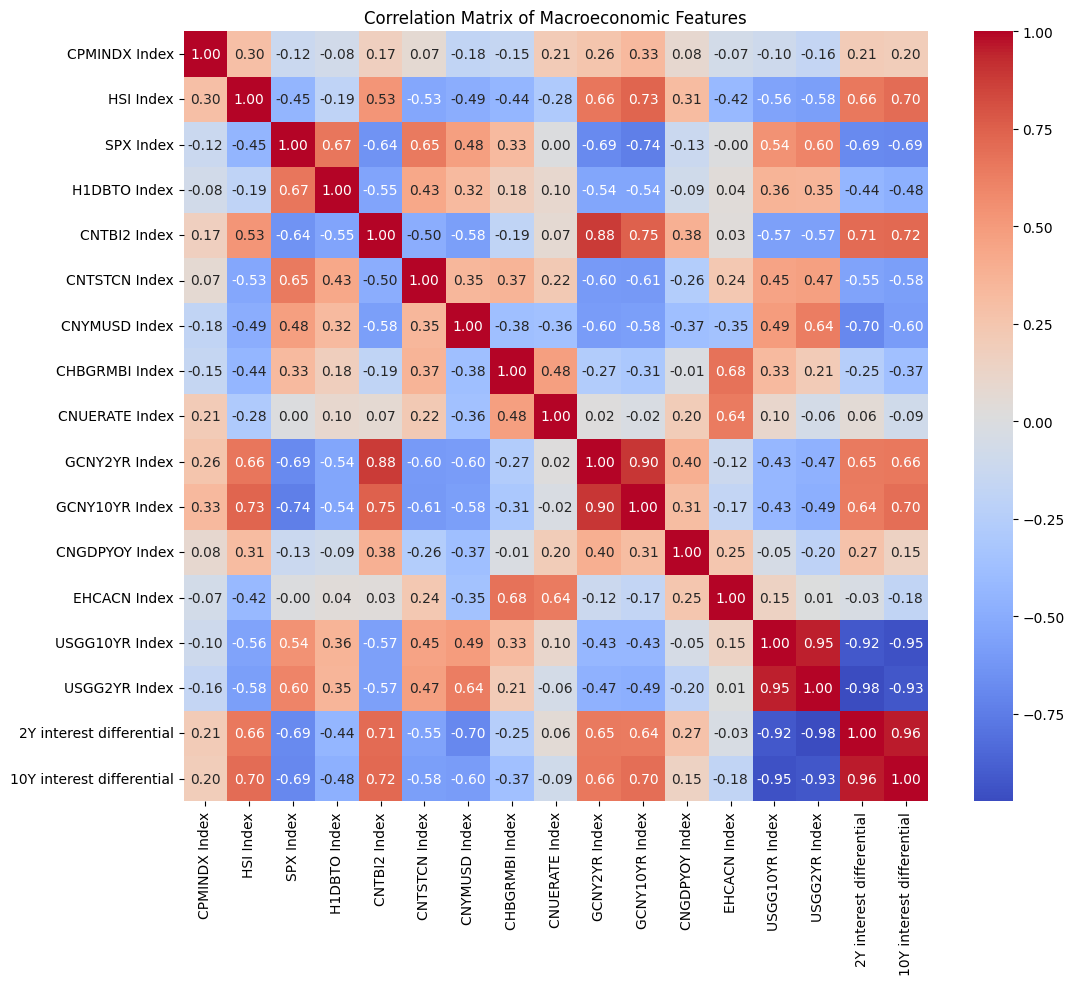

In [ ]:
# prompt: identify relationship between features

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Macroeconomic Features')
plt.show()


In [ ]:
# prompt: do a pca with all the  features

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'df' is your DataFrame as defined in the previous code

# Separate features (X)
X = df

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with all features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative Explained Variance Ratio
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Print or plot the explained variance ratio to see how much variance each component explains
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)


# You can now use X_pca for further analysis or visualization
# For example, to plot the first two principal components:

# from sklearn.decomposition import PCA

# # Create principal components
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

display(X_pca.head())

# plt.figure(figsize=(8, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("PCA of Macroeconomic Features")
# plt.show()



Explained Variance Ratio: [4.73096015e-01 1.60342573e-01 8.83254475e-02 7.31938195e-02
 6.00400435e-02 4.01279193e-02 2.95895169e-02 2.55274048e-02
 1.67573960e-02 1.47104147e-02 6.97987736e-03 4.76296019e-03
 3.42205409e-03 2.03318821e-03 1.09137035e-03 7.38769094e-18
 0.00000000e+00]
Cumulative Explained Variance: [0.47309601 0.63343859 0.72176404 0.79495785 0.8549979  0.89512582
 0.92471533 0.95024274 0.96700014 0.98171055 0.98869043 0.99345339
 0.99687544 0.99890863 1.         1.         1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,3.644010,2.530775,0.835759,-0.690271,-0.430718,0.498075,0.478538,1.131742,-0.184820,-0.122671,-0.562170,0.009023,0.203472,-0.048848,0.498634,1.079763e-15,-4.788490e-15
1,3.691618,2.516538,0.802987,-0.667534,-0.415421,0.510369,0.484299,1.131931,-0.176846,-0.111548,-0.527928,-0.012409,0.187290,-0.062825,0.450847,1.006633e-15,-4.157949e-15
2,3.571770,2.611079,0.633942,-0.580669,-0.297640,0.605451,0.371029,1.169912,-0.096341,-0.211361,-0.623011,0.108787,-0.015998,-0.095663,0.358594,4.612432e-16,-2.902936e-15
3,3.618338,2.621473,0.568307,-0.668568,-0.378931,0.565013,0.434899,1.077124,-0.158286,-0.189915,-0.595654,0.133160,-0.006281,-0.120513,0.301938,8.368199e-17,-2.425355e-15
4,3.562983,2.645665,0.545708,-0.656441,-0.362117,0.628534,0.405178,0.983336,-0.170204,-0.140592,-0.565348,0.158602,-0.040681,-0.068590,0.274573,1.456451e-16,-1.976964e-15


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
CPMINDX Index,0.088067,0.044013,0.166920,0.661546,-0.497519,-0.065431,-0.017112,-0.357830,0.035034,-0.364962,-0.087975,-0.012466,-0.020316,-0.037102,-0.023485,-3.356516e-16,-2.448775e-17
HSI Index,0.270450,-0.160849,0.075835,0.323095,0.261146,0.299205,-0.058425,-0.077823,0.155787,0.292883,0.303645,-0.539529,-0.186957,0.247726,-0.184360,1.955351e-15,3.657135e-15
SPX Index,-0.283031,-0.006964,-0.086622,0.287388,0.257443,0.129776,0.339872,0.057895,-0.415332,-0.240552,0.540294,0.109979,0.215415,0.065564,0.206603,8.641713e-16,-2.219903e-15
H1DBTO Index,-0.206641,0.004887,-0.170927,0.434198,0.409872,0.086534,-0.397987,0.412688,0.310271,-0.207262,-0.247643,0.163340,-0.022394,-0.086727,0.009378,-4.755569e-16,-6.978018e-16
CNTBI2 Index,0.292408,0.100581,0.178229,-0.080329,-0.013992,-0.030243,0.367465,0.481191,0.008020,-0.405532,-0.081999,-0.247011,-0.448466,-0.027329,0.253672,1.332159e-15,-1.148608e-15
CNTSTCN Index,-0.245619,0.128698,-0.134973,0.279754,-0.233321,0.030761,0.584895,0.243181,0.280167,0.511160,-0.154280,0.067653,0.024001,-0.001162,-0.035625,9.832488e-17,3.341689e-16
CNYMUSD Index,-0.238479,-0.365336,0.040858,-0.045004,-0.115559,-0.414940,0.018893,0.173120,0.092439,-0.158157,0.156784,0.145923,-0.200023,0.563960,-0.390657,1.312186e-15,4.400829e-15
CHBGRMBI Index,-0.126471,0.473950,-0.071168,-0.118059,0.052562,0.520877,0.085762,-0.173990,-0.122198,-0.182409,-0.186138,0.172168,-0.271204,0.306754,-0.385391,-3.827045e-16,4.619839e-15
CNUERATE Index,-0.016736,0.494143,0.009658,0.162732,-0.191829,-0.282927,-0.368845,0.345398,-0.467699,0.281670,0.135418,-0.138094,-0.101804,0.033148,-0.099112,1.707347e-16,2.075774e-15
GCNY2YR Index,0.297726,0.035202,0.352682,-0.004914,-0.014943,0.131483,0.076368,0.329256,-0.029776,-0.105199,-0.131293,-0.004682,0.684101,0.149989,-0.315491,-8.638281e-02,-1.650976e-01


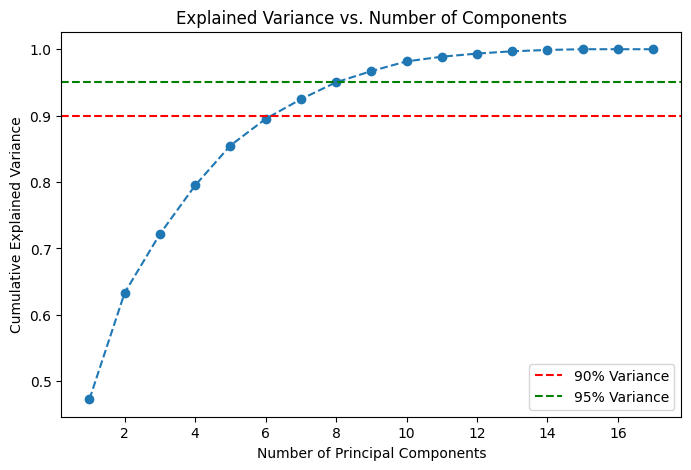

Optimal number of PCA components: 8


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 18), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

# Find the optimal number of components
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of PCA components: {optimal_components}")


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = macroeconomic indicators

# Apply PCA
pca = PCA(n_components=8)  # Keep 9 principal components
X_pca = pca.fit_transform(X_scaled)

# Convert back to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(8)])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by each component: {explained_variance}")
print(f"Total variance explained by 9 components: {sum(explained_variance):.2f}")


Variance explained by each component: [0.47309601 0.16034257 0.08832545 0.07319382 0.06004004 0.04012792
 0.02958952 0.0255274 ]
Total variance explained by 9 components: 0.95


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Target variable (e.g., Real Effective Exchange Rate)
y = price[['CNH Curncy']].astype(float)
X_pca_df = X_pca_df.astype(float)
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, shuffle=False)  # No shuffle for time-series



In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1]
}

xgb = XGBRegressor()
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


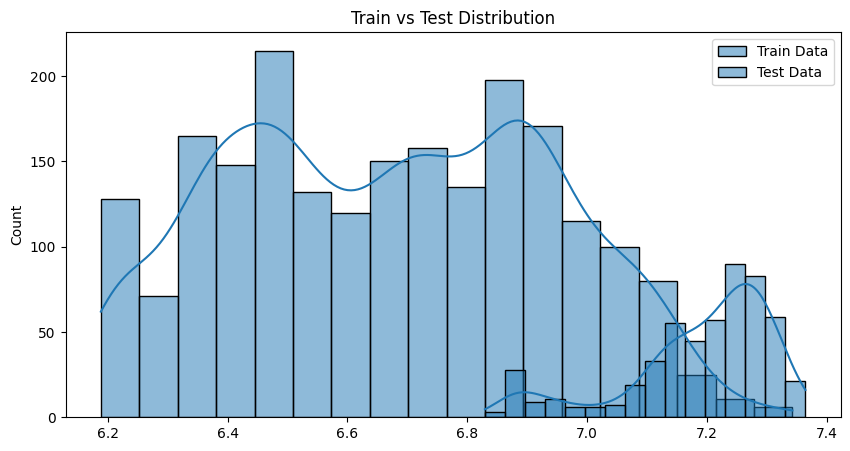

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(y_train, color='blue', label="Train Data", kde=True)
sns.histplot(y_test, color='red', label="Test Data", kde=True)
plt.legend()
plt.title("Train vs Test Distribution")
plt.show()


In [ ]:
best_xgb = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Compute R² Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")

Train R² Score: 0.9926
Test R² Score: -2.4593


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Make predictions
y_pred = model.predict(X_test)
# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.2246
MSE: 0.0961
RMSE: 0.3100
R² Score: -5.4941


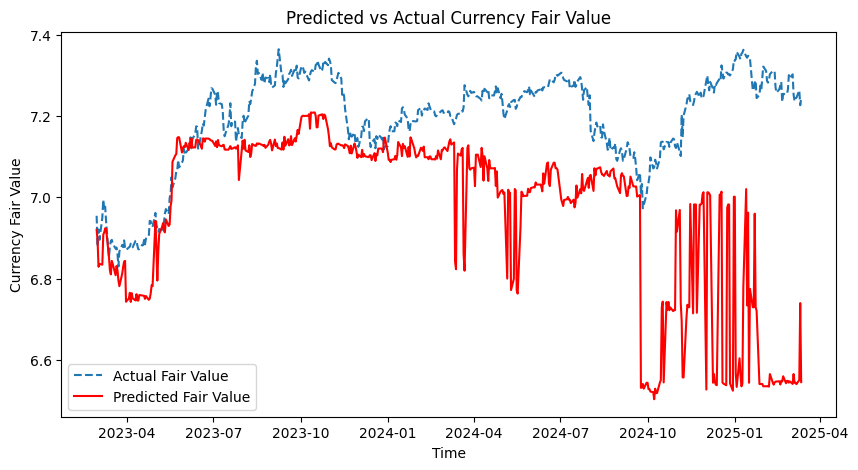

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual Fair Value", linestyle='dashed')
plt.plot(y_test.index, y_pred, label="Predicted Fair Value", color='red')
plt.xlabel("Time")
plt.ylabel("Currency Fair Value")
plt.legend()
plt.title("Predicted vs Actual Currency Fair Value")
plt.show()


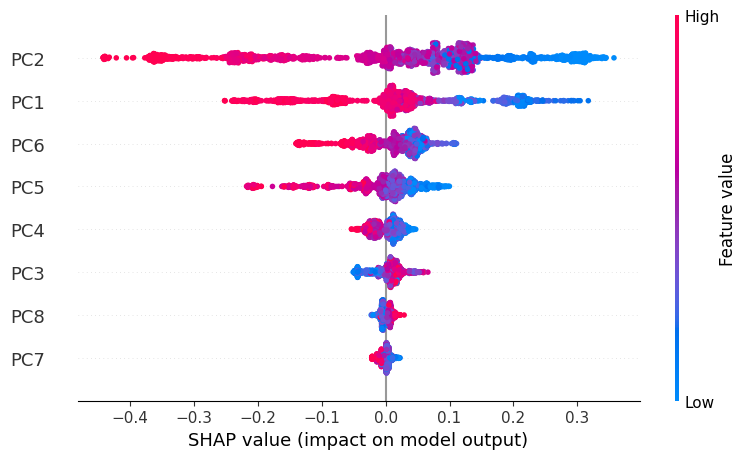

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_pca_df)

shap.summary_plot(shap_values, X_pca_df)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 23.0420 - val_loss: 0.7073
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3848 - val_loss: 0.4072
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3213 - val_loss: 0.3392
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2637 - val_loss: 0.4556
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2301 - val_loss: 0.5938
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2180 - val_loss: 0.4822
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1991 - val_loss: 0.4378
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1933 - val_loss: 0.4649
Epoch 9/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1832 - val_loss: 0.7444
Epoch 10/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1780 - val_loss: 0.6757
Epoch 11/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1658 - val_loss: 0.7371
Epoch 12/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/st

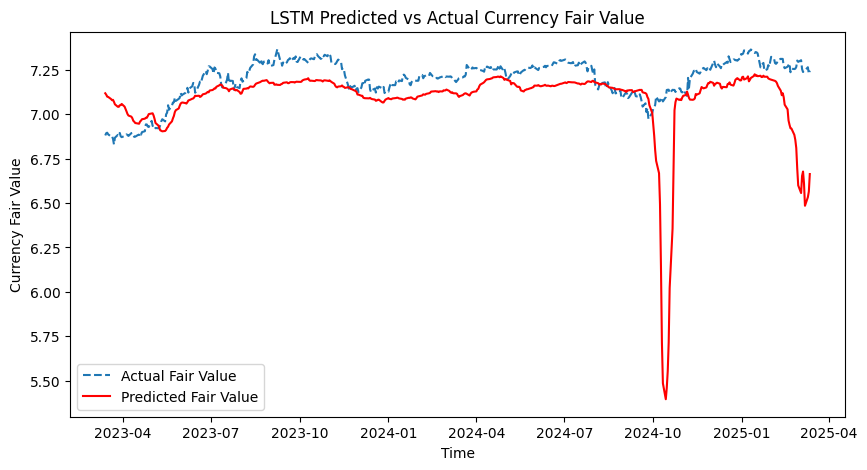

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load your dataset (X = macroeconomic variables, y = fair value of currency)
# X: (time series features), y: (target currency fair value)
# Make sure your dataset has a date index
# X, y = load_your_data() # Replace with actual data loading

# Standardize the data (important for PCA & LSTM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 9 components
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for better handling
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(9)], index=X.index)

# Split into training and testing sets
train_size = int(len(X_pca_df) * 0.8)
X_train, X_test = X_pca_df[:train_size], X_pca_df[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM: (samples, timesteps, features)
def create_lstm_data(X, y, time_steps=10):
    X_lstm, y_lstm = [], []
    for i in range(len(X) - time_steps):
        X_lstm.append(X.iloc[i : i + time_steps].values)
        y_lstm.append(y.iloc[i + time_steps])
    return np.array(X_lstm), np.array(y_lstm)

# Create LSTM data with time window of 10 days
time_steps = 10
X_train_lstm, y_train_lstm = create_lstm_data(X_train, y_train, time_steps)
X_test_lstm, y_test_lstm = create_lstm_data(X_test, y_test, time_steps)

# Define LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)  # Output layer
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train Model
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=16, validation_data=(X_test_lstm, y_test_lstm), verbose=1)

# Make Predictions
y_pred = model.predict(X_test_lstm)

# Plot Actual vs Predicted Fair Value
plt.figure(figsize=(10,5))
plt.plot(y_test.index[time_steps:], y_test_lstm, label="Actual Fair Value", linestyle='dashed')
plt.plot(y_test.index[time_steps:], y_pred, label="Predicted Fair Value", color='red')
plt.xlabel("Time")
plt.ylabel("Currency Fair Value")
plt.legend()
plt.title("LSTM Predicted vs Actual Currency Fair Value")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_lstm, y_pred)
mse = mean_squared_error(y_test_lstm, y_pred)
rmse = np.sqrt(mse)
direction_accuracy = np.mean(np.sign(y_pred[:-1] - y_pred[1:]) == np.sign(y_test_lstm[:-1] - y_test_lstm[1:])) * 100

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Directional Accuracy: {direction_accuracy:.2f}%")


MAE: 0.1306
MSE: 0.0549
RMSE: 0.2344
Directional Accuracy: 46.07%


InvalidIndexError: (slice(None, None, None), array([2, 5, 4, 0, 1]))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset (replace with actual data loading)
# X = macroeconomic variables, y = currency fair value
# Ensure the dataset has a time index
X = df
y = price[['CNH Curncy']].astype(float)

# Step 1: Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n=8
# Step 2: Apply PCA
pca = PCA(n_components=n)  # Reduce to 9 principal components
X_pca = pca.fit_transform(X_scaled)

# Convert PCA data to DataFrame for easier handling
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n)], index=X.index)

# Step 3: Split Train-Test Data
train_size = int(len(X_pca_df) * 0.8)
X_train_pca, X_test_pca = X_pca_df[:train_size], X_pca_df[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Train XGBoost Model on PCA Data
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)  # Tuned parameters
xgb.fit(X_train_pca, y_train)

# Step 5: Feature Importance Selection
feature_importance = xgb.feature_importances_
important_pca_features = np.argsort(feature_importance)[-5:]  # Select Top 5 PCA components
X_train_pca_important = X_train_pca.iloc[:, important_pca_features]
X_test_pca_important = X_test_pca.iloc[:, important_pca_features]

# # Step 6: Generate XGBoost Predictions for LSTM Input
# y_xgb_train_pred = xgb.predict(X_train_pca_important)
# y_xgb_test_pred = xgb.predict(X_test_pca_important)

y_xgb_train_pred = xgb.predict(X_train_pca_important, validate_features=False)
y_xgb_test_pred = xgb.predict(X_test_pca_important, validate_features=False)


# Step 7: Create Time-Series Sequences for LSTM
def create_lstm_sequences(data, target, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_steps):
        X_seq.append(data[i:i+time_steps])
        y_seq.append(target[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10
X_lstm_train, y_lstm_train = create_lstm_sequences(y_xgb_train_pred, y_train, time_steps)
X_lstm_test, y_lstm_test = create_lstm_sequences(y_xgb_test_pred, y_test, time_steps)

# Step 8: Train LSTM Model
lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_lstm_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(16, activation="relu"),
    Dense(1)
])

lstm.compile(optimizer="adam", loss="mean_squared_error")
lstm.fit(X_lstm_train, y_lstm_train, epochs=100, batch_size=16, validation_data=(X_lstm_test, y_lstm_test), verbose=1)

# Step 9: Make Final Hybrid Predictions
y_hybrid_pred = lstm.predict(X_lstm_test)

# Step 10: Evaluate Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_lstm_test, y_hybrid_pred)
mse = mean_squared_error(y_lstm_test, y_hybrid_pred)
rmse = np.sqrt(mse)

print(f"Hybrid Model MAE: {mae:.4f}")
print(f"Hybrid Model MSE: {mse:.4f}")
print(f"Hybrid Model RMSE: {rmse:.4f}")

# Step 11: Visualize Predictions vs Actual
plt.figure(figsize=(10,5))
plt.plot(y_test.index[time_steps:], y_lstm_test, label="Actual Fair Value", linestyle='dashed')
plt.plot(y_test.index[time_steps:], y_hybrid_pred, label="Predicted Fair Value (Hybrid Model)", color='red')
plt.xlabel("Time")
plt.ylabel("Currency Fair Value")
plt.legend()
plt.title("Hybrid Model: Predicted vs Actual Currency Fair Value")
plt.show()


XGBoostError: [14:28:10] /workspace/src/predictor/cpu_predictor.cc:789: Check failed: m->NumColumns() == model.learner_model_param->num_feature (5 vs. 8) : Number of columns in data must equal to trained model.
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7ec199c5c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x75ea80) [0x7ec19a15ea80]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x75f6f6) [0x7ec19a15f6f6]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5aa1e8) [0x7ec199faa1e8]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5fde69) [0x7ec199ffde69]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x16a7ac) [0x7ec199b6a7ac]
  [bt] (6) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromColumnar+0x10b) [0x7ec199b6afcb]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7ec22fddfe2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7ec22fddc493]



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df
y = price[['CNH Curncy']].astype(float)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Macroeconomic dataset

pca = PCA(n_components=9)  # Reduce to 9 features
X_pca = pca.fit_transform(X_scaled)


In [ ]:
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Train XGBoost on PCA data
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
xgb.fit(X_pca, y)

# Select top PCA features
feature_importance = xgb.feature_importances_
important_pca_features = np.argsort(feature_importance)[-5:]
X_pca_selected = X_pca[:, important_pca_features]

# Reshape data for LSTM (Time Series)
def create_sequences(data, target, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_steps):
        X_seq.append(data[i:i+time_steps])
        y_seq.append(target.iloc[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10
X_lstm, y_lstm = create_sequences(X_pca_selected, y, time_steps)

# Train LSTM model
lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(16, activation="relu"),
    Dense(1)
])
lstm.compile(optimizer="adam", loss="mean_squared_error")
lstm.fit(X_lstm, y_lstm, epochs=100, batch_size=16, verbose=1)

# Predict fair value
y_fair_value = lstm.predict(X_lstm)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


166/166 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 18.4295
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0622
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0216
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0135
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0116
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0098
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0093
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0080
Epoch 9/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0077
Epoch 10/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0067
Epoch 11/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0063
Epoch 12/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0059
Epoch 13/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0050
Epoch 14/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0048
Epoch 15/100
166/166 ━━━━━━━━━━━━━━━━━━━

In [ ]:
y_fair_value

array([[6.2646112],
       [6.2655287],
       [6.2646866],
       ...,
       [7.2521973],
       [7.2478256],
       [7.2484937]], dtype=float32)

In [ ]:
import numpy as np

deviation = (market_price - y_fair_value) / y_fair_value
threshold = 0.03  # 3% deviation

# Generate trade signals
long_signal = deviation < -threshold  # Buy when undervalued
short_signal = deviation > threshold  # Sell when overvalued


In [ ]:
position_size = np.abs(deviation) * 10000  # Adjust trade size dynamically

stop_loss = market_price * 0.98  # 2% SL
take_profit = y_fair_value  # TP at fair value


In [ ]:
initial_capital = 100000  # Starting capital
capital = initial_capital
pnl = []

for i in range(len(market_price)):
    if long_signal[i]:  # Buy trade
        entry_price = market_price[i]
        exit_price = y_fair_value[i]
        trade_pnl = (exit_price - entry_price) * position_size[i]
        capital += trade_pnl
    elif short_signal[i]:  # Sell trade
        entry_price = market_price[i]
        exit_price = y_fair_value[i]
        trade_pnl = (entry_price - exit_price) * position_size[i]
        capital += trade_pnl
    pnl.append(capital)

# Plot capital growth
import matplotlib.pyplot as plt

plt.plot(pnl, label="Capital Growth")
plt.xlabel("Time")
plt.ylabel("Equity ($)")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train (80%) and test (20%) sets before PCA
train_size = int(len(X) * 0.8)

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply same scaler

# Apply PCA on train and transform test
pca = PCA(n_components=9)  # Keep 9 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply same PCA transformation


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost on the PCA-transformed training set
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
xgb.fit(X_train_pca, y_train)

# Make predictions (train & test)
y_xgb_train_pred = xgb.predict(X_train_pca)
y_xgb_test_pred = xgb.predict(X_test_pca)


In [ ]:
import numpy as np

def create_lstm_sequences(data, target, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_steps):
        X_seq.append(data[i:i+time_steps])
        y_seq.append(target.iloc[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10

# Convert XGBoost outputs into LSTM sequences
X_lstm_train, y_lstm_train = create_lstm_sequences(y_xgb_train_pred, y_train, time_steps)
X_lstm_test, y_lstm_test = create_lstm_sequences(y_xgb_test_pred, y_test, time_steps)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM Model
lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_lstm_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(16, activation="relu"),
    Dense(1)
])

# Compile LSTM Model
lstm.compile(optimizer="adam", loss="mean_squared_error")

# Train LSTM
lstm.fit(X_lstm_train, y_lstm_train, epochs=100, batch_size=16, validation_data=(X_lstm_test, y_lstm_test), verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 28.9533 - val_loss: 0.2369
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0719 - val_loss: 0.2605
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0715 - val_loss: 0.2671
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0739 - val_loss: 0.2947
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0715 - val_loss: 0.2828
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0717 - val_loss: 0.2471
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0743 - val_loss: 0.2484
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0704 - val_loss: 0.2888
Epoch 9/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0696 - val_loss: 0.2941
Epoch 10/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0717 - val_loss: 0.3060
Epoch 11/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0714 - val_loss: 0.2708
Epoch 12/100
133/133 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Predict fair value for the test set
y_hybrid_pred = lstm.predict(X_lstm_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_lstm_test, y_hybrid_pred)
mse = mean_squared_error(y_lstm_test, y_hybrid_pred)
rmse = np.sqrt(mse)

print(f"Hybrid Model MAE: {mae:.4f}")
print(f"Hybrid Model MSE: {mse:.4f}")
print(f"Hybrid Model RMSE: {rmse:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Hybrid Model MAE: 0.1363
Hybrid Model MSE: 0.0264
Hybrid Model RMSE: 0.1625


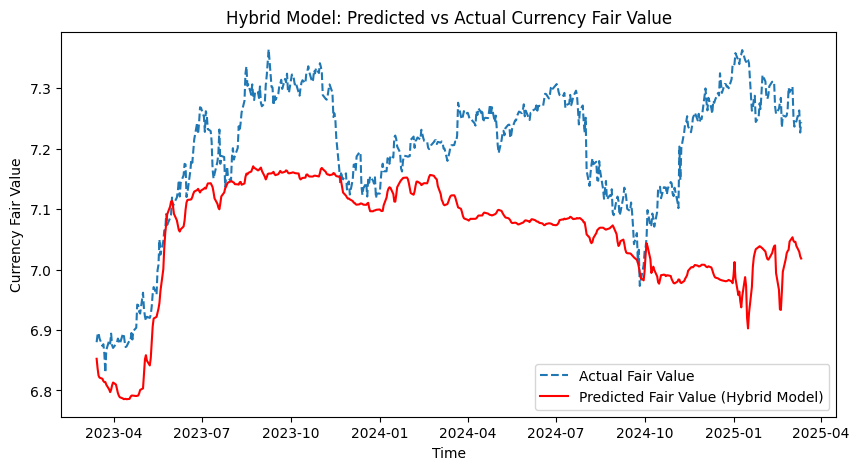

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.index[time_steps:], y_lstm_test, label="Actual Fair Value", linestyle='dashed')
plt.plot(y_test.index[time_steps:], y_hybrid_pred, label="Predicted Fair Value (Hybrid Model)", color='red')
plt.xlabel("Time")
plt.ylabel("Currency Fair Value")
plt.legend()
plt.title("Hybrid Model: Predicted vs Actual Currency Fair Value")
plt.show()
